In [4]:
# Import required libraries
import os
import glob
import json

# Initialize dictionary
#fileDict = {"CIA":{}, "DIA":{}, "FBI":{}, "NSA":{}, "USCBP":{}}

names = []
texts = []

# Iterate through files, if not correct file (.txt extension) then skip, otherwise add to correct location in dictionary
for infile in glob.glob(os.path.join("./dataset", '*')):
    if(infile.endswith(".txt")):
        continue
    review_file = open(infile,'r').read()
    subKey = infile.split("/")[-1]
    mainKey = subKey.split("_")[0]
    names.append(subKey)
    texts.append(review_file)
    #fileDict[mainKey][subKey] = review_file



In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
from num2words import num2words
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benjaminpfeffer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/benjaminpfeffer/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [123]:
from sklearn.cluster import KMeans
import pandas as pd
import collections

In [7]:
stopwords = nltk.corpus.stopwords.words('english')

In [66]:
textFull = []
for text in texts:
    currText = text.lower()
    tokens = word_tokenize(currText)
    
    # Remove stopwords
    no_stop = [w for w in tokens if w not in stopwords]
    
    # Remove punctuation
    no_punct = [w for w in no_stop if w.isalnum()]
    
    # Remove single characters
    no_single = [w for w in no_punct if len(w)>1]
    
    # Lemmative (stemming, but more meaningful and more computationally expensive)
    # Initialize wordnet lemmatizer
    wnl = WordNetLemmatizer()

    # Perform lemmatization
    lemmatized = [wnl.lemmatize(w, pos="v") for w in no_single]
    
    # Numbers to words
    num_words = []
    for w in lemmatized:
        if(w.isnumeric()):
            #num_words.append(num2words(w))
            continue
        else:
            num_words.append(w)
    
    textFull.append(num_words)

In [67]:
textListFull = []
for textList in textFull:
    textListFull.append(" ".join(textList))

In [68]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(textListFull)

# Get the shape, matches 249 documents given as data
print(tfidf_matrix.shape)

(111, 1776)


In [69]:
terms = vectorizer.get_feature_names()

/Users/benjaminpfeffer/no/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


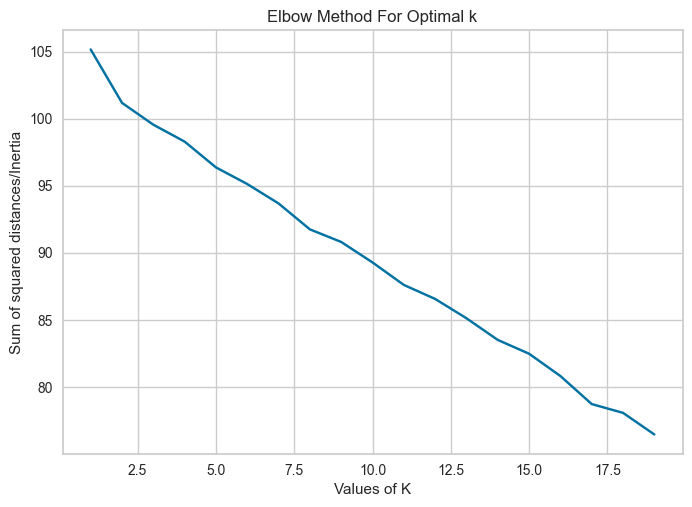

In [70]:
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

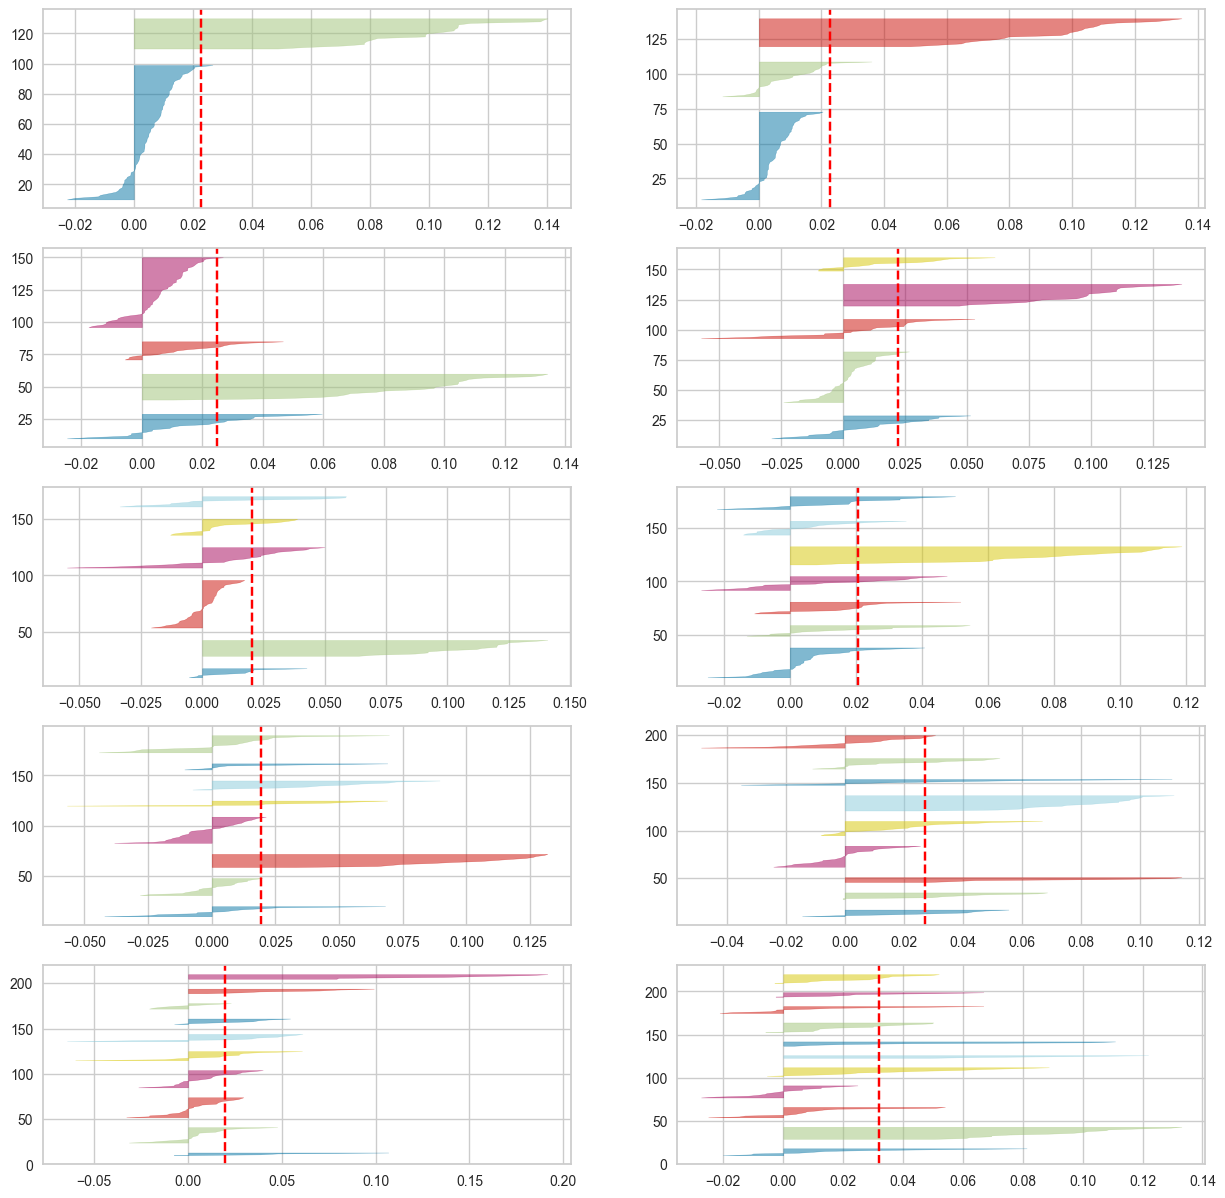

In [71]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
  
fig, ax = plt.subplots(5, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(tfidf_matrix) 

In [72]:
visualizer.silhouette_score_

0.031892272083003874

In [100]:


num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [101]:
clusters

[0,
 1,
 1,
 0,
 0,
 3,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 3,
 1,
 3,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 0,
 1,
 0,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 1,
 1,
 3,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [102]:
names

['CIA_30',
 'CIA_08',
 'CIA_37',
 'CIA_01',
 'CIA_39',
 'CIA_06',
 'FBI_10',
 'FBI_28',
 'FBI_17',
 'FBI_21',
 'FBI_19',
 'FBI_26',
 'CIA_38',
 'USCBP_02',
 'CIA_07',
 'CIA_09',
 'CIA_36',
 'CIA_31',
 'FBI_18',
 'FBI_27',
 'FBI_20',
 'FBI_29',
 'FBI_16',
 'FBI_11',
 'NSA_20',
 'NSA_18',
 'NSA_11',
 'NSA_16',
 'NSA_17',
 'NSA_10',
 'NSA_19',
 'NSA_21',
 'NSA_03',
 'NSA_04',
 'NSA_05',
 'NSA_02',
 'FBI_33',
 'FBI_34',
 'FBI_02',
 'CIA_40',
 'FBI_05',
 'CIA_13',
 'CIA_14',
 'DIA_01',
 'CIA_22',
 'CIA_25',
 'FBI_04',
 'FBI_03',
 'CIA_41',
 'FBI_35',
 'FBI_32',
 'CIA_24',
 'CIA_23',
 'CIA_15',
 'CIA_12',
 'FBI_14',
 'FBI_13',
 'FBI_25',
 'FBI_22',
 'CIA_34',
 'CIA_33',
 'CIA_05',
 'FBI_40',
 'CIA_02',
 'FBI_23',
 'FBI_24',
 'FBI_12',
 'FBI_15',
 'FBI_41',
 'CIA_03',
 'USCBP_01',
 'CIA_04',
 'CIA_32',
 'CIA_35',
 'NSA_15',
 'NSA_12',
 'NSA_13',
 'NSA_14',
 'NSA_22',
 'NSA_07',
 'NSA_09',
 'NSA_08',
 'NSA_01',
 'NSA_06',
 'CIA_17',
 'DIA_02',
 'CIA_28',
 'CIA_10',
 'CIA_26',
 'CIA_19',
 'CIA_

In [113]:
clusterDf = pd.DataFrame()
clusterDf["File"] = names
clusterDf["Text"] = texts
clusterDf["Cluster"] = clusters

In [114]:
clusterDf.head()

,File,Text,Cluster
0,CIA_30,Sources tracking Cesar Arze in Santo Domingo r...,0
1,CIA_08,Mohamed al Omari is a Saudi who was apprehende...,1
2,CIA_37,"In the CIA Report for 13 February, 2004 it was...",1
3,CIA_01,A Russian named Igor Kolokov was arrested in C...,0
4,CIA_39,Our source has now been employed by the Hollan...,0


In [105]:
# # DELETE THIS
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = filtered_tokens#[stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [106]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in textListFull:#texts:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [107]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [108]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    
    print("Cluster %d titles:" % i, end='')
    for title in clusterDf.set_index("Cluster").loc[i]['File'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'source', b'report', b'hanif', b'safrygin', b'bugarov', b'cuba',

Cluster 0 titles: CIA_30, CIA_01, CIA_39, FBI_21, CIA_38, CIA_09, CIA_36, CIA_31, CIA_14, DIA_01, CIA_25, CIA_41, CIA_23, CIA_12, CIA_34, CIA_05, CIA_03, CIA_04, CIA_32, CIA_17, CIA_28, CIA_10, CIA_21, FBI_39, CIA_43, CIA_27, CIA_18, CIA_42,

Cluster 1 words: b'al', b'say', b'name', b'detroit', b'find', b'report',

Cluster 1 titles: CIA_08, CIA_37, FBI_10, FBI_28, FBI_17, FBI_19, FBI_26, CIA_07, FBI_18, FBI_20, FBI_29, NSA_04, FBI_33, FBI_34, FBI_02, CIA_40, FBI_05, CIA_22, FBI_04, FBI_03, FBI_32, CIA_15, FBI_14, FBI_13, FBI_22, CIA_33, CIA_02, FBI_23, FBI_12, FBI_15, USCBP_01, CIA_35, DIA_02, CIA_19, FBI_37, FBI_08, FBI_06, FBI_01, CIA_20, CIA_11, DIA_03, CIA_16, CIA_29, FBI_07, FBI_38, FBI_31, FBI_36, FBI_09,

Cluster 2 words: b'call', b'phone', b'caller', b'location', b'say', b'intercept',

Cluster 2 titles: NSA_20, NSA_18, NSA_11, NSA_16, NSA_17, NSA_10, NSA_19, NSA_21, NSA_0

In [ ]:
# Labels: sources/reports, POI information, communications, surveillance data

In [110]:
clusterDf[clusterDf.Cluster==1]

,File,Cluster
1,CIA_08,1
2,CIA_37,1
6,FBI_10,1
7,FBI_28,1
8,FBI_17,1
10,FBI_19,1
11,FBI_26,1
14,CIA_07,1
18,FBI_18,1
20,FBI_20,1


In [131]:
clustDict = {}
for i in range(len(clusterDf)):
    cNum = str(clusterDf.iloc[i].Cluster)
    doc = clusterDf.iloc[i].File
    text = clusterDf.iloc[i].Text
    try:
        clustDict[cNum][doc] = text
    except:
        clustDict[cNum] = {}
        clustDict[cNum][doc] = text


clustDict = dict(collections.OrderedDict(sorted(clustDict.items())))

In [132]:

# Export dictionary to json file
with open('Project2Data.json', 'w') as fp:
    json.dump(clustDict, fp)